In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, precision_score, recall_score, f1_score

In [10]:
df = pd.read_csv('Bank Customer Churn Prediction.csv', header = 0)

In [12]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [16]:
df.shape

(10000, 12)

In [18]:
df.size

120000

In [20]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [24]:
df.isnull().values.any()

False

In [26]:
df.columns


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [28]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [39]:
print("Unique values in 'country':", df["country"].unique())
print("Unique values in 'gender':", df["gender"].unique())
print("Unique values in 'products_number':", df["products_number"].unique())
print("Unique values in 'credit_card':", df["credit_card"].unique())
print("Unique values in 'active_member':", df["active_member"].unique())
print("Unique values in 'churn':", df["churn"].unique())


Unique values in 'country': ['France' 'Spain' 'Germany']
Unique values in 'gender': ['Female' 'Male']
Unique values in 'products_number': [1 3 2 4]
Unique values in 'credit_card': [1 0]
Unique values in 'active_member': [1 0]
Unique values in 'churn': [1 0]


In [41]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [43]:
df.axes

[RangeIndex(start=0, stop=10000, step=1),
 Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
        'balance', 'products_number', 'credit_card', 'active_member',
        'estimated_salary', 'churn'],
       dtype='object')]

In [45]:
df.iloc[0:4]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [51]:
df.loc[:, "customer_id"]


0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: customer_id, Length: 10000, dtype: int64

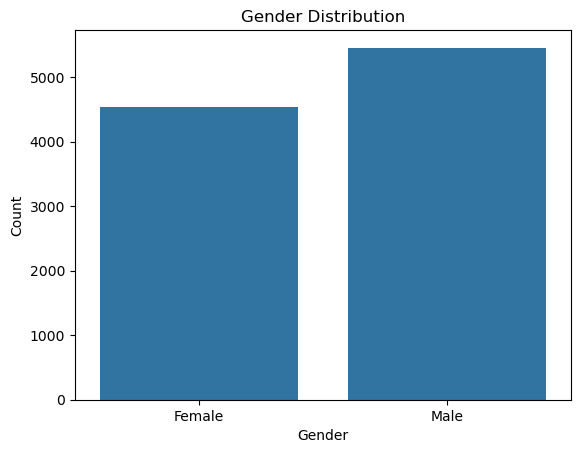

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


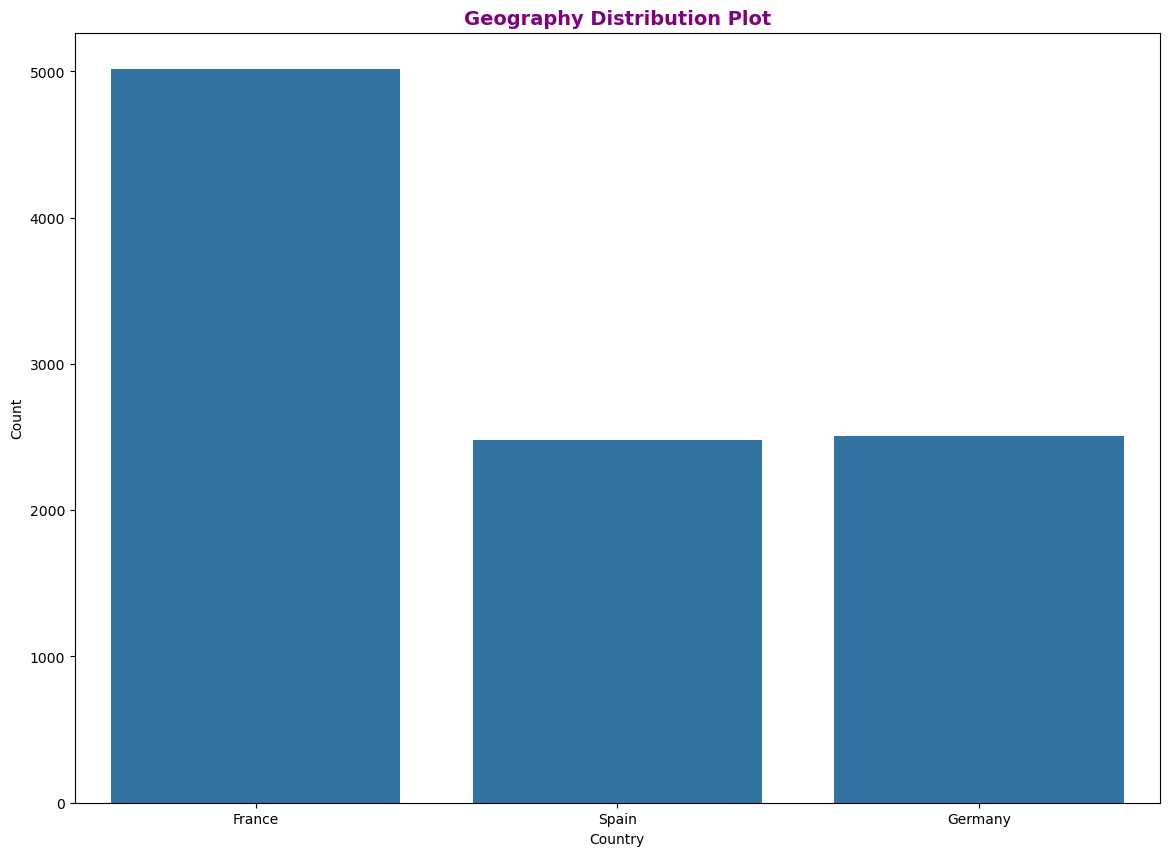

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.countplot(x='country', data=df)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Geography Distribution Plot', fontsize=14, fontweight="bold", color="purple")
plt.show()


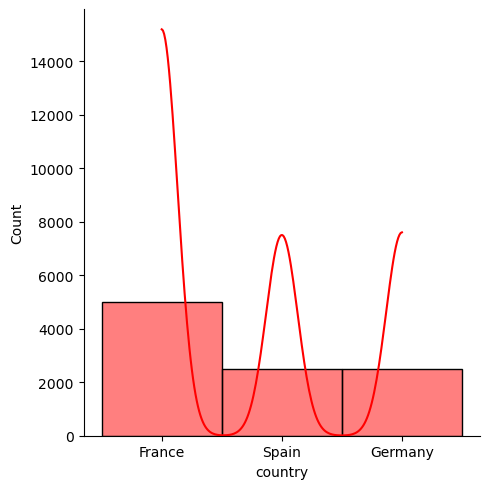

In [63]:
sns.displot(df['country'], kde=True, color='red')


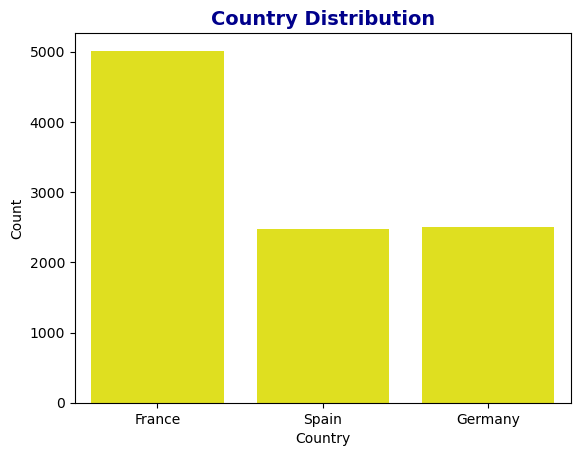

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='country', data=df, color="yellow")
plt.title('Country Distribution', fontsize=14, fontweight="bold", color="darkblue")
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


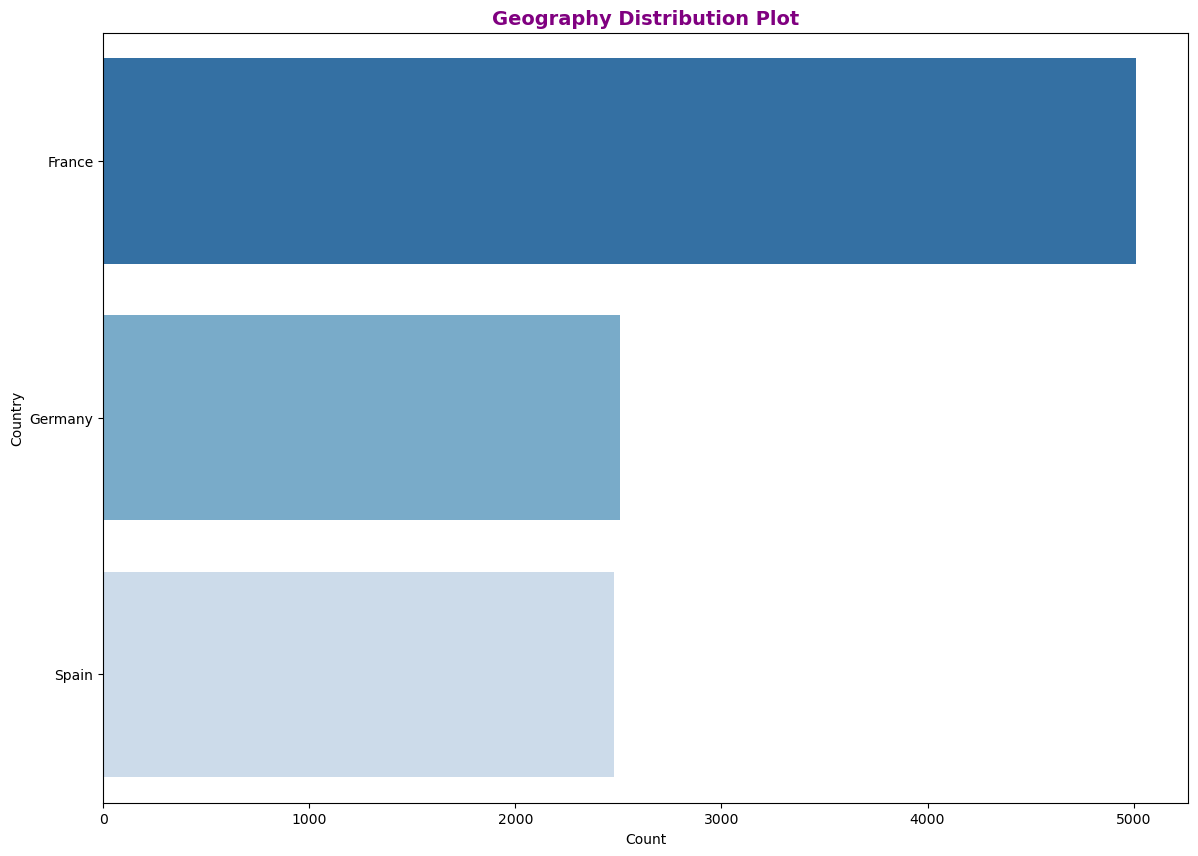

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
geo_df = count1.reset_index()
geo_df.columns = ['country', 'count']
sns.barplot(data=geo_df, x='count', y='country', hue='country', dodge=False, palette='Blues_r', legend=False)
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Geography Distribution Plot', fontsize=14, fontweight="bold", color="purple")
plt.xticks(rotation=0)
plt.show()


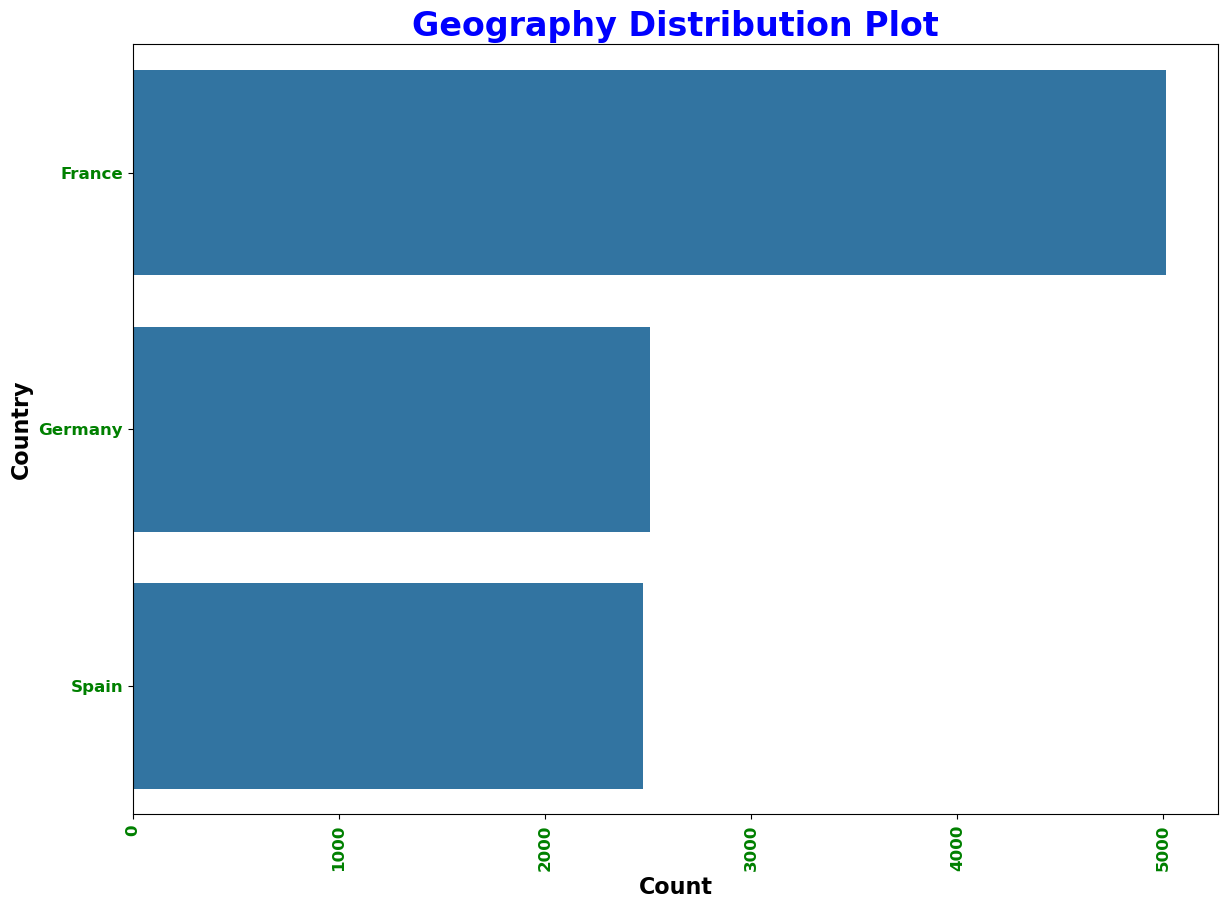

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))
count1 = df["country"].value_counts()
sns.barplot(x=count1.values, y=count1.index, orient='h')
plt.xlabel('Count', fontsize=16, fontweight='bold')
plt.ylabel('Country', fontsize=16, fontweight='bold')
plt.title('Geography Distribution Plot', fontsize=24, fontweight='bold', color='blue')
plt.xticks(rotation=90, fontsize=12, fontweight='bold', color='green')
plt.yticks(fontsize=12, fontweight='bold', color='green')
plt.show()


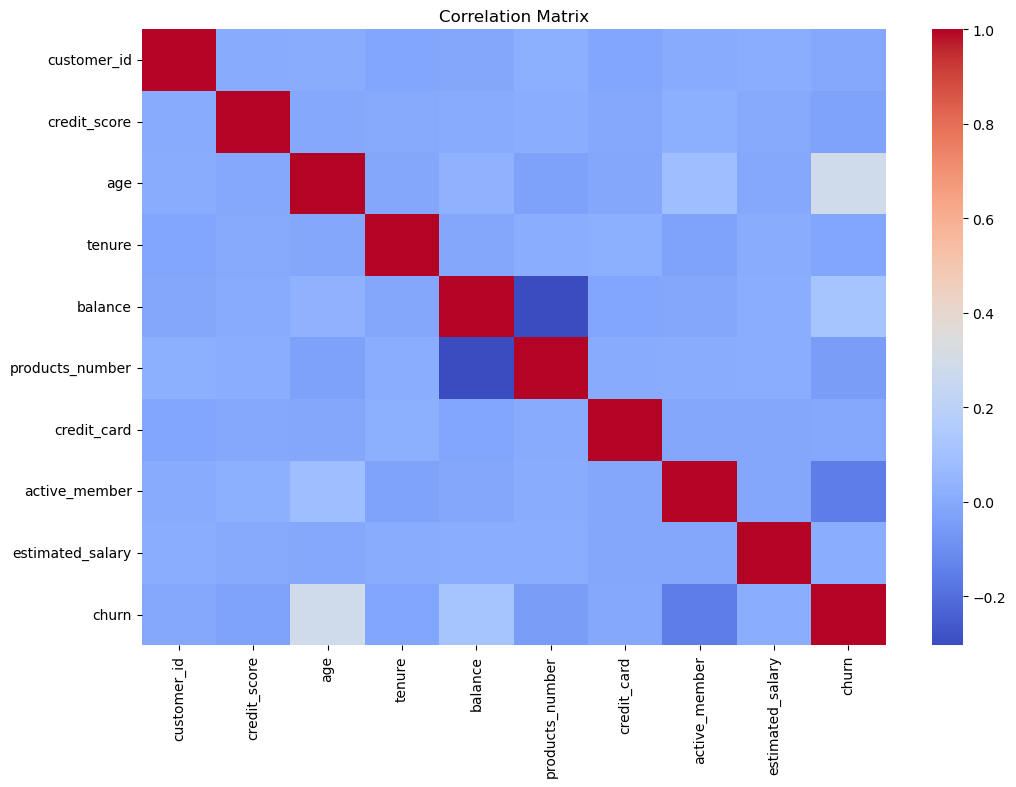

In [87]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [89]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
df = pd.get_dummies(df, drop_first = True)

In [97]:
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [101]:
lr_model = LogisticRegression()

In [124]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model


LogisticRegression()

In [126]:
gb_model = GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.02, max_depth = 1, random_state=42)